# Start-ups Problem
## ------------------------------------------------------------------------------------------------------------------------------

## Problem Statement :  Prepare a prediction model for profit of 50_startups data.
##   Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

### R&D Spend -- Research and devolop spend in the past few years
### Administration -- spend on administration in the past few years
### Marketing Spend -- spend on Marketing in the past few years
### State -- states from which data is collected
### Profit  -- profit of each state in the past few yearsPrepare a prediction model for profit of 50_startups data.

## 1) Import Libraries :

In [155]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

## 2) Import Dataset :

In [83]:
startup_data = pd.read_csv('50_Startups.csv',sep=',')
startup_data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


## 3) Data Understanding :

### 3.1 Initial Analysis :

In [84]:
startup_data.shape

(50, 5)

In [85]:
startup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [86]:
startup_data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [87]:
startup_data.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [88]:
startup_data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### 3.2 Data Preparation:

In [89]:
startup_data.columns = ['rd_spend','administration_spend','marketing_spend','state','profit']
startup_data

,rd_spend,administration_spend,marketing_spend,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [90]:
startup_data = startup_data.drop(labels='state',axis=1)
startup_data

,rd_spend,administration_spend,marketing_spend,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


### 3.3 Assumptions check :

#### Assumption -1 : Linearity check

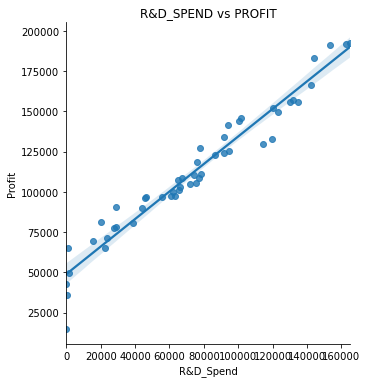

In [91]:
sns.lmplot(x='rd_spend',y='profit',data=startup_data)
plt.title('R&D_SPEND vs PROFIT')
plt.xlabel('R&D_Spend')
plt.ylabel('Profit')
plt.show()

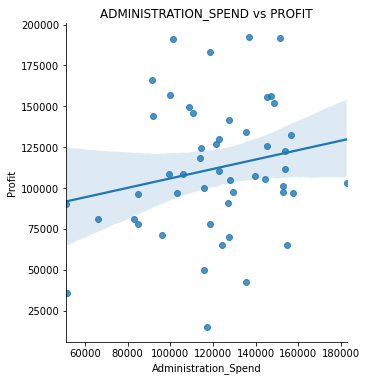

In [92]:
sns.lmplot(x='administration_spend',y='profit',data=startup_data)
plt.title('ADMINISTRATION_SPEND vs PROFIT')
plt.xlabel('Administration_Spend')
plt.ylabel('Profit')
plt.show()

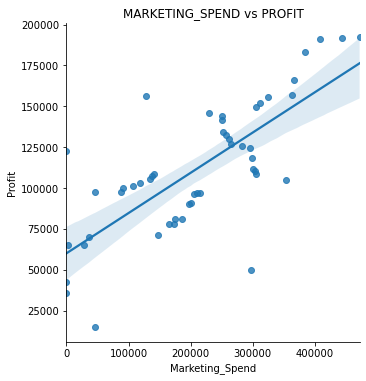

In [93]:
sns.lmplot(x='marketing_spend',y='profit',data=startup_data)
plt.title('MARKETING_SPEND vs PROFIT')
plt.xlabel('Marketing_Spend')
plt.ylabel('Profit')
plt.show()

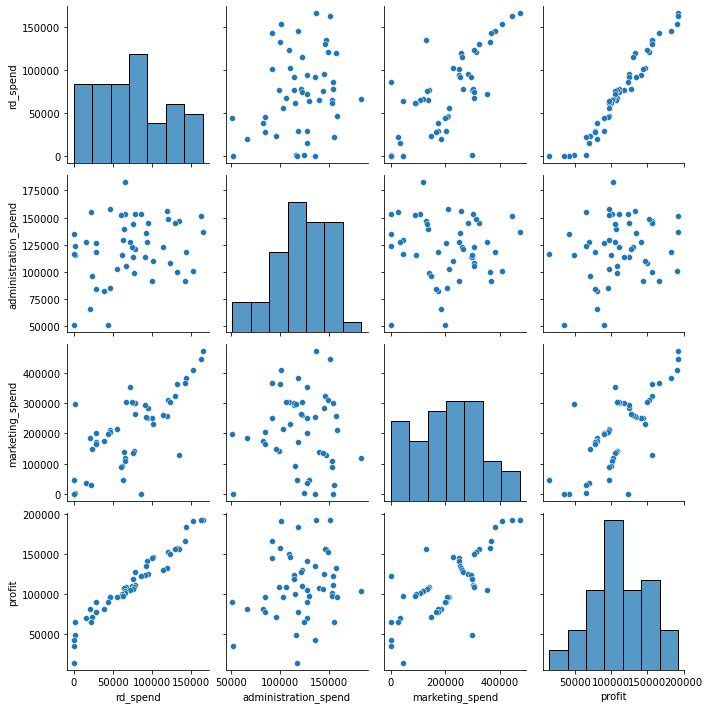

In [94]:
sns.pairplot(startup_data)
plt.show()

#### OBSERVATION :- Linearity check "Failed".

#### Assumption-2 : Normality Test 

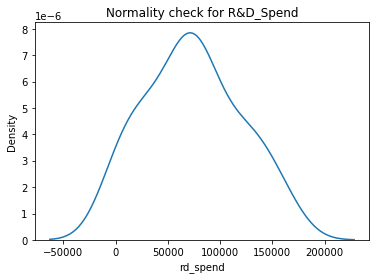

In [95]:
sns.distplot(a = startup_data['rd_spend'], hist = False)
plt.title('Normality check for R&D_Spend')
plt.show()

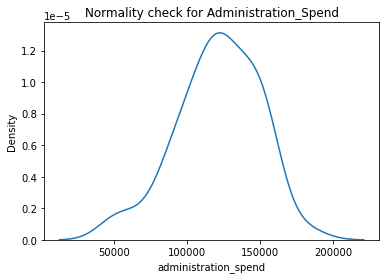

In [96]:
sns.distplot(a = startup_data['administration_spend'], hist = False)
plt.title('Normality check for Administration_Spend')
plt.show()

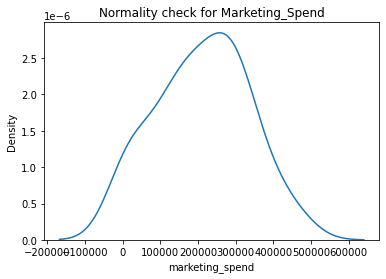

In [97]:
sns.distplot(a = startup_data['marketing_spend'], hist = False)
plt.title('Normality check for Marketing_Spend')
plt.show()

#### OBSERVATION :- Normality test "FAILED".

### Assumption- 3 : Multi-Collinearity test 

In [98]:
startup_data_corr_matrix = startup_data.corr().round(2)
startup_data_corr_matrix

,rd_spend,administration_spend,marketing_spend,profit
rd_spend,1.00,0.24,0.72,0.97
administration_spend,0.24,1.00,-0.03,0.20
marketing_spend,0.72,-0.03,1.00,0.75
profit,0.97,0.20,0.75,1.00


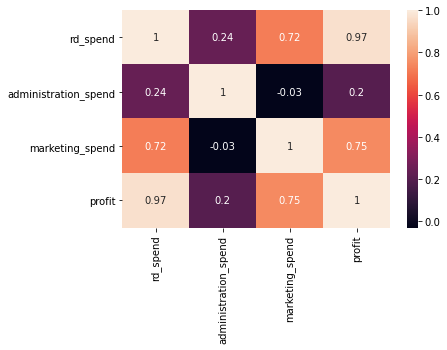

In [99]:
sns.heatmap(startup_data_corr_matrix, annot = True)
plt.show()

#### OBSERVATION :- Multi-Collinearity test "FAILED".

#### Assumption- 4 : Autoregression 

#### OBSERVATION :- Auto-Regression test "PASSED".

#### Assumption - 5 : Homoscadascity || Assumption - 6 : Zero Residual Mean test 

#### NOTE:- To be done after model testing.

### 4) Model Building :

In [100]:
X = startup_data.drop(labels ='profit', axis = 1)
y = startup_data[['profit']]

In [101]:
X

,rd_spend,administration_spend,marketing_spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42
5,131876.90,99814.71,362861.36
6,134615.46,147198.87,127716.82
7,130298.13,145530.06,323876.68
8,120542.52,148718.95,311613.29
9,123334.88,108679.17,304981.62


In [102]:
y

,profit
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94
5,156991.12
6,156122.51
7,155752.60
8,152211.77
9,149759.96


In [103]:
X.mean()

rd_spend                 73721.6156
administration_spend    121344.6396
marketing_spend         211025.0978
dtype: float64

In [109]:
X.std()

rd_spend                 45902.256482
administration_spend     28017.802755
marketing_spend         122290.310726
dtype: float64

In [110]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
scaled_X= std_scaler.fit_transform(X)
scaled_X

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01],
       [ 1.03036886e+00,  9.86952101e-01,  8.30886909e-01],
       [ 1.09181921e+00, -4.56640246e-01,  7.76107440e-01],
       [ 6.20398248e-01, -3.87599089e-01,  1.49807267e-01],
       [ 5.93085418e-01, -1.06553960e+00,  3.19833623e-01],
       [ 4.43259872e-01,  2.15449064e-01,  3.20617441e-01],
       [ 4.02077603e-01,  5.10178953e-01,  3.43956788e-01],
       [ 1.01718075e+00,  1.26919939e+00,  3.75742273e-01],
       [ 8.97913123e-01,  4.58678535e-02,  4.19218702e-01],
       [ 9.44411957e-02,  9.11841968e-03

In [111]:
scaled_X = pd.DataFrame(data=scaled_X,columns=['rd_spend','administration_spend','marketing_spend'])
scaled_X

,rd_spend,administration_spend,marketing_spend
0,2.016411,0.560753,2.153943
1,1.955860,1.082807,1.923600
2,1.754364,-0.728257,1.626528
3,1.554784,-0.096365,1.422210
4,1.504937,-1.079919,1.281528
5,1.279800,-0.776239,1.254210
6,1.340066,0.932147,-0.688150
7,1.245057,0.871980,0.932186
8,1.030369,0.986952,0.830887
9,1.091819,-0.456640,0.776107


In [112]:
scaled_X.mean()

rd_spend                1.199041e-16
administration_spend   -2.919887e-16
marketing_spend        -9.325873e-17
dtype: float64

In [113]:
scaled_X.std()

rd_spend                1.010153
administration_spend    1.010153
marketing_spend         1.010153
dtype: float64

### 5) Model Training :

In [114]:
from sklearn.linear_model import LinearRegression
linear_model_1 = LinearRegression()
linear_model_1.fit(scaled_X,y)

LinearRegression()

### 6) Model Testing :

In [115]:
y_predict = linear_model_1.predict(scaled_X)
y_predict

array([[192521.25289008],
       [189156.76823226],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327],
       [163580.7805712 ],
       [158114.09666865],
       [160021.36304781],
       [151741.69969865],
       [154884.68410995],
       [135509.01636714],
       [135573.71296074],
       [129138.05418243],
       [127487.99166275],
       [149548.64633453],
       [146235.1599852 ],
       [116915.40540144],
       [130192.44720781],
       [129014.2268059 ],
       [115635.21636716],
       [116639.6692309 ],
       [117319.45164029],
       [114706.98171695],
       [109996.61522126],
       [113362.96611314],
       [102237.72506481],
       [110600.5753503 ],
       [114408.07145684],
       [101660.02600497],
       [101794.98345176],
       [ 99452.37293606],
       [ 97687.85627575],
       [ 99001.32898549],
       [ 97915.00780465],
       [ 89039.27374116],
       [ 90511.59956753],
       [ 75286.17458546],
       [ 89619.5377079 ],
       [ 696

### 7) Model Evaluation :

In [116]:
error = y - y_predict
error

,profit
0,-259.422890
1,2635.291768
2,8903.110904
3,9205.289974
4,-5951.574183
5,-6589.660571
6,-1991.586669
7,-4268.763048
8,470.070301
9,-5124.724110


####  ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Now checking for the Homoscadacity and zero residual mean assumption check

#### Assumption- 5 : Homoscadascity check

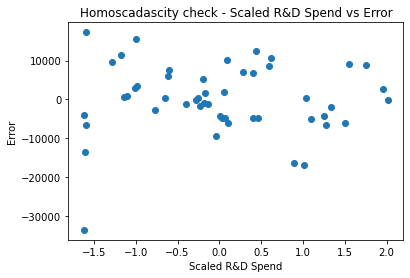

In [117]:
plt.scatter(x= scaled_X['rd_spend'],y=error)
plt.title('Homoscadascity check - Scaled R&D Spend vs Error')
plt.xlabel('Scaled R&D Spend')
plt.ylabel('Error')
plt.show()

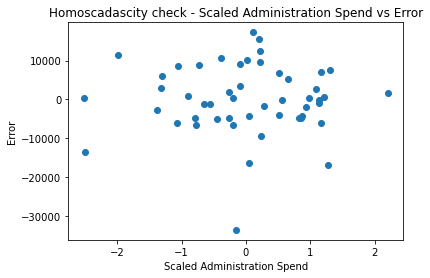

In [118]:
plt.scatter(x= scaled_X['administration_spend'],y=error)
plt.title('Homoscadascity check - Scaled Administration Spend vs Error')
plt.xlabel('Scaled Administration Spend')
plt.ylabel('Error')
plt.show()

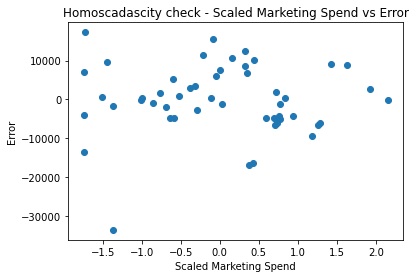

In [119]:
plt.scatter(x= scaled_X['marketing_spend'],y=error)
plt.title('Homoscadascity check - Scaled Marketing Spend vs Error')
plt.xlabel('Scaled Marketing Spend')
plt.ylabel('Error')
plt.show()

#### OBSRVATION :- Homoscadascity check "FAILED".

#### Assumption- 6 : Zero Residual Mean check 

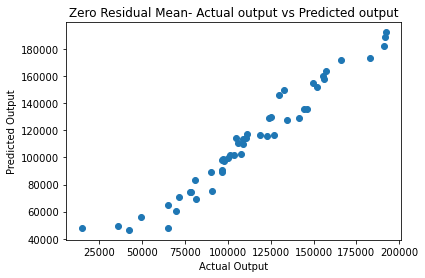

In [120]:
plt.scatter(x=y,y=y_predict)
plt.title('Zero Residual Mean- Actual output vs Predicted output')
plt.xlabel('Actual Output')
plt.ylabel('Predicted Output')
plt.show()

#### OBSERVATION :- Zero Residual Mean check "FAILED".

### ----------------------------------------------------------------------------------------------------------------------------------------------------------------

In [121]:
startup_data.head()

,rd_spend,administration_spend,marketing_spend,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [129]:
X = startup_data.drop(labels = 'profit',axis = 1)

#### Model Building :

In [130]:
import statsmodels.formula.api as smf

In [332]:
model_1= smf.ols(formula= 'profit ~ rd_spend + administration_spend + marketing_spend',data=startup_data).fit()
model_1

In [333]:
#prediction
y_predict_1 = model_1.predict(X)

#### Model Testing :

In [134]:
model_1.params

Intercept               50122.192990
rd_spend                    0.805715
administration_spend       -0.026816
marketing_spend             0.027228
dtype: float64

In [140]:
model_1.pvalues

Intercept               1.057379e-09
rd_spend                2.634968e-22
administration_spend    6.017551e-01
marketing_spend         1.047168e-01
dtype: float64

In [141]:
model_1.tvalues

Intercept                7.626218
rd_spend                17.846374
administration_spend    -0.525507
marketing_spend          1.655077
dtype: float64

In [142]:
print('R2 Score          :',round(model_1.rsquared,5)) 
print('Adjusted R2 Score :',round(model_1.rsquared_adj,5))
print('AIC               :',round(model_1.aic,4))
print('BIC               :',round(model_1.bic,4))

R2 Score          : 0.95075
Adjusted R2 Score : 0.94753
AIC               : 1058.7715
BIC               : 1066.4196


In [143]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           4.53e-30
Time:                        16:51:33   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
rd_spend                 0.8057      0.045     17.846      0.000       0.715       0.897
administration_spend    -0.0268      0.051     -0.526      0.602      -0.130       0.076
marketing_spend          0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [178]:
model_2= smf.ols(formula= 'profit ~ rd_spend + administration_spend ',data=startup_data).fit()
model_2

In [179]:
print('R2 Score          :',round(model_2.rsquared,5)) 
print('Adjusted R2 Score :',round(model_2.rsquared_adj,5))
print('AIC               :',round(model_2.aic,4))
print('BIC               :',round(model_2.bic,4))

R2 Score          : 0.94781
Adjusted R2 Score : 0.94559
AIC               : 1059.6637
BIC               : 1065.3998


In [180]:
model_3= smf.ols(formula= 'profit ~ rd_spend + marketing_spend ',data=startup_data).fit()
model_3

In [181]:
print('R2 Score          :',round(model_3.rsquared,5)) 
print('Adjusted R2 Score :',round(model_3.rsquared_adj,5))
print('AIC               :',round(model_3.aic,4))
print('BIC               :',round(model_3.bic,4))

R2 Score          : 0.95045
Adjusted R2 Score : 0.94834
AIC               : 1057.0708
BIC               : 1062.8068


### Model deletion diagnostics :

##### Detecting influencers and outliers "

#### Cook's Distance :

In [152]:
from statsmodels.graphics.regressionplots import influence_plot

In [154]:
model_1_influence = model_1.get_influence()
(c,_) = model_1_influence.cooks_distance

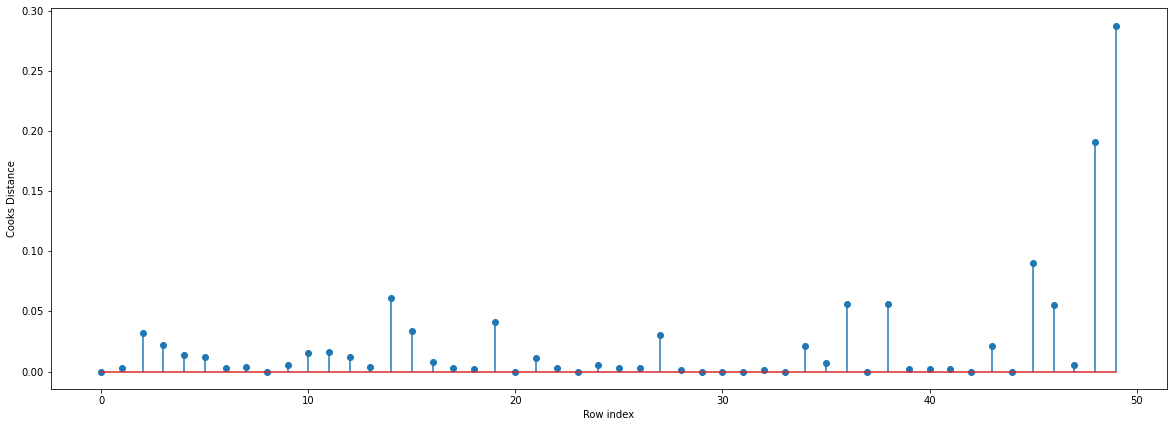

In [158]:
#Plotting influencers

fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup_data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [159]:
#Checking the index and c value of influencer

(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

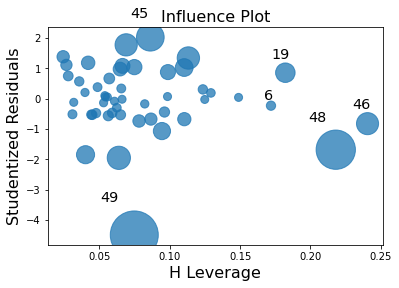

In [165]:
#High influence plot

influence_plot(model_1)
plt.show()

In [166]:
#Leverage cutoff value

k = startup_data.shape[1]
n = startup_data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.30000000000000004

In [167]:
#From the above influence plot we can see that points at 49,48 are the major influencers

startup_data[startup_data.index.isin([48,49])]

,rd_spend,administration_spend,marketing_spend,profit
48,542.05,51743.15,0.00,35673.41
49,0.00,116983.80,45173.06,14681.40


In [313]:
startup_data.head()

,rd_spend,administration_spend,marketing_spend,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


### Improving the model :

In [314]:
#Discard the data points which are influencers and reasign the row number (reset_index())

startup_data_new_1=startup_data.drop(startup_data.index[[48,49]],axis=0).reset_index()
startup_data_new_1

,index,rd_spend,administration_spend,marketing_spend,profit
0,0,165349.20,136897.80,471784.10,192261.83
1,1,162597.70,151377.59,443898.53,191792.06
2,2,153441.51,101145.55,407934.54,191050.39
3,3,144372.41,118671.85,383199.62,182901.99
4,4,142107.34,91391.77,366168.42,166187.94
5,5,131876.90,99814.71,362861.36,156991.12
6,6,134615.46,147198.87,127716.82,156122.51
7,7,130298.13,145530.06,323876.68,155752.60
8,8,120542.52,148718.95,311613.29,152211.77
9,9,123334.88,108679.17,304981.62,149759.96


In [315]:
model_4= smf.ols(formula= 'profit ~ rd_spend + administration_spend + marketing_spend',data=startup_data_new_1).fit()
model_4

In [316]:
model_4.params

Intercept               59098.493334
rd_spend                    0.789495
administration_spend       -0.063349
marketing_spend             0.016895
dtype: float64

In [317]:
print('R2 Score          :',round(model_4.rsquared,5)) 
print('Adjusted R2 Score :',round(model_4.rsquared_adj,5))
print('AIC               :',round(model_4.aic,4))
print('BIC               :',round(model_4.bic,4))

R2 Score          : 0.96268
Adjusted R2 Score : 0.96013
AIC               : 994.669
BIC               : 1002.1538


In [318]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           2.03e-31
Time:                        19:05:08   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
rd_spend                 0.7895      0.036     21.718      0.000       0.716       0.863
administration_spend    -0.0633      0.044     -1.442      0.156      -0.152       0.025
marketing_spend          0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### ------------------------------------------------------------------------------------------------------------------------------------------------------------

### Model Transformation :

In [319]:
startup_dataset_1 = startup_data.copy()
startup_dataset_1.head()

,rd_spend,administration_spend,marketing_spend,profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [320]:
startup_dataset_1['rd_spend'] = np.cbrt(startup_dataset_1['rd_spend'])
startup_dataset_1['administration_spend'] = np.log(startup_dataset_1['administration_spend'])
startup_dataset_1['marketing_spend'] = np.cbrt(startup_dataset_1['marketing_spend'])
startup_dataset_1

,rd_spend,administration_spend,marketing_spend,profit
0,54.886731,11.826990,77.848055,192261.83
1,54.580578,11.927533,76.283024,191792.06
2,53.536210,11.524316,74.164629,191050.39
3,52.459974,11.684117,72.634289,182901.99
4,52.184177,11.422911,71.541871,166187.94
5,50.900601,11.511071,71.325842,156991.12
6,51.250524,11.899540,50.359650,156122.51
7,50.696665,11.888138,68.674139,155752.60
8,49.398461,11.909814,67.796196,152211.77
9,49.776991,11.596155,67.311803,149759.96


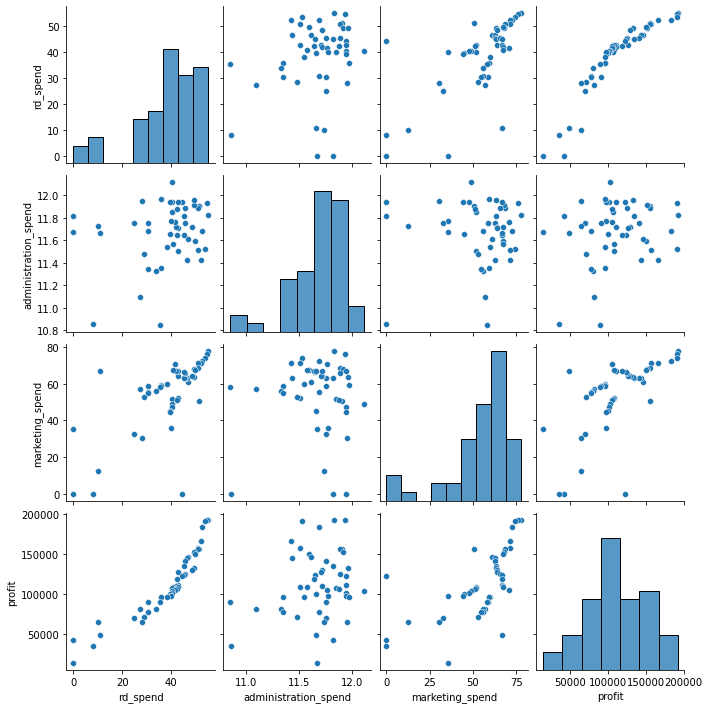

In [321]:
sns.pairplot(startup_dataset_1)
plt.show()

## Finally improving the original model -:

In [323]:
model_5 = smf.ols(formula= 'profit ~ rd_spend + administration_spend + marketing_spend ',data=startup_data_new_1).fit()

In [324]:
while model_5.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model_5=smf.ols(formula= 'profit ~ rd_spend + administration_spend + marketing_spend ',data=startup_data_new_1).fit()
        (c,_)=model_5.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        startup_data_new_1=startup_data_new_1.drop(startup_data_new_1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        startup_data_new_1
    else:
        final_model=smf.ols(formula= 'profit ~ rd_spend + administration_spend + marketing_spend ',data=startup_data_new_1).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209415
Thus model accuracy is improved to 0.9663901957918793
Thus model accuracy is improved to 0.9706076169779905
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090916
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.9831149926392769
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improved to 0.9877191935547199
Thus model accuracy is improved to 0.9858356627471713
Thus model accuracy is improv

### Improving the transformed model :-

In [325]:
 model_6=smf.ols(formula= 'profit ~ rd_spend + administration_spend + marketing_spend ',data=startup_dataset_1).fit()

In [326]:
while model_6.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model_6=smf.ols(formula= 'profit ~ rd_spend + administration_spend + marketing_spend ',data=startup_dataset_1).fit()
        (c,_)=model_6.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        startup_dataset_1=startup_dataset_1.drop(startup_dataset_1.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        startup_dataset_1
    else:
        final_transform_model=smf.ols(formula= 'profit ~ rd_spend + administration_spend + marketing_spend ',data=startup_dataset_1).fit()
        print("Thus model accuracy is improved to",final_transform_model.rsquared)

Thus model accuracy is improved to 0.8504368870758803
Thus model accuracy is improved to 0.875253432014253
Thus model accuracy is improved to 0.8798837408502622
Thus model accuracy is improved to 0.8931229193507455
Thus model accuracy is improved to 0.8953128292607168
Thus model accuracy is improved to 0.9027800199915227
Thus model accuracy is improved to 0.9133992695872211
Thus model accuracy is improved to 0.9149477306006488
Thus model accuracy is improved to 0.919439284734784
Thus model accuracy is improved to 0.9283166012408854
Thus model accuracy is improved to 0.927181026703147
Thus model accuracy is improved to 0.9253825981554316
Thus model accuracy is improved to 0.9225179387057472
Thus model accuracy is improved to 0.9280816461832722
Thus model accuracy is improved to 0.9284895438104152
Thus model accuracy is improved to 0.927730097301819
Thus model accuracy is improved to 0.9352267635161451
Thus model accuracy is improved to 0.9389309714836659
Thus model accuracy is improved 

### Table containing R-squared Values

In [330]:
r2_values = {'Test_Models' :['Model_1','Model_2','Model_3','Model_4','Improved_original_model','Improved_transformation_Model'],
            'R_square values' : [model_1.rsquared,model_2.rsquared,model_3.rsquared,model_4.rsquared,final_model.rsquared,final_transform_model.rsquared]}
table_r2 = pd.DataFrame(r2_values)
table_r2

,Test_Models,R_square values
0,Model_1,0.950746
1,Model_2,0.947813
2,Model_3,0.950450
3,Model_4,0.962677
4,Improved_original_model,0.988276
5,Improved_transformation_Model,0.994753
